In [56]:
import pandas as pd

In [57]:
file_path = './files_new2/df_month_age_any.xlsx'
df_month_age_any = pd.read_excel(file_path)
df_month_age_any.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   수진자연령    5631 non-null   int64 
 1   심결본인부담금  5631 non-null   int64 
 2   연령대      5631 non-null   object
 3   요양개시일자   5631 non-null   int64 
 4   요양개시월    5631 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 220.1+ KB


In [58]:
# 월별 연령대별 수진자연령 집계하기
pivot_month_age = df_month_age_any.pivot_table(values='수진자연령',
                            index='요양개시월',
                            columns='연령대',
                            aggfunc='count')
pivot_month_age = pivot_month_age.fillna(0)
pivot_month_age

연령대,10대,20대,30대,40대,50대,60대,70대,80대,90대,9세이하
요양개시월,,,,,,,,,,
1,39.0,15.0,40.0,52.0,108.0,95.0,76.0,9.0,2.0,52.0
2,28.0,26.0,39.0,45.0,69.0,63.0,78.0,6.0,0.0,53.0
3,34.0,33.0,33.0,43.0,67.0,111.0,91.0,15.0,0.0,70.0
4,36.0,22.0,44.0,53.0,71.0,81.0,72.0,4.0,3.0,59.0
5,35.0,30.0,34.0,50.0,75.0,109.0,94.0,16.0,0.0,53.0
6,23.0,15.0,30.0,52.0,55.0,110.0,80.0,11.0,1.0,36.0
7,31.0,21.0,34.0,69.0,71.0,108.0,78.0,11.0,1.0,52.0
8,32.0,17.0,28.0,52.0,86.0,89.0,74.0,6.0,1.0,73.0
9,38.0,26.0,35.0,57.0,64.0,81.0,90.0,6.0,1.0,62.0


In [59]:
pivot_month_age.describe()

연령대,10대,20대,30대,40대,50대,60대,70대,80대,90대,9세이하
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000
mean,33.250000,24.083333,36.833333,53.583333,73.000000,96.50000,85.250000,10.166667,0.833333,55.750000
std,6.047163,6.694072,6.350853,7.038315,13.170214,15.84298,11.298632,4.195958,0.937437,9.743296
min,23.000000,15.000000,28.000000,43.000000,55.000000,63.00000,72.000000,4.000000,0.000000,36.000000
25%,30.250000,19.250000,33.750000,51.500000,67.000000,87.00000,77.500000,6.000000,0.000000,51.750000
50%,34.500000,24.000000,34.500000,52.500000,70.500000,99.50000,83.500000,10.000000,1.000000,53.000000
75%,38.250000,30.500000,40.000000,54.750000,73.500000,109.25000,91.000000,13.500000,1.000000,59.750000
max,40.000000,33.000000,51.000000,69.000000,108.000000,115.00000,112.000000,16.000000,3.000000,73.000000


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

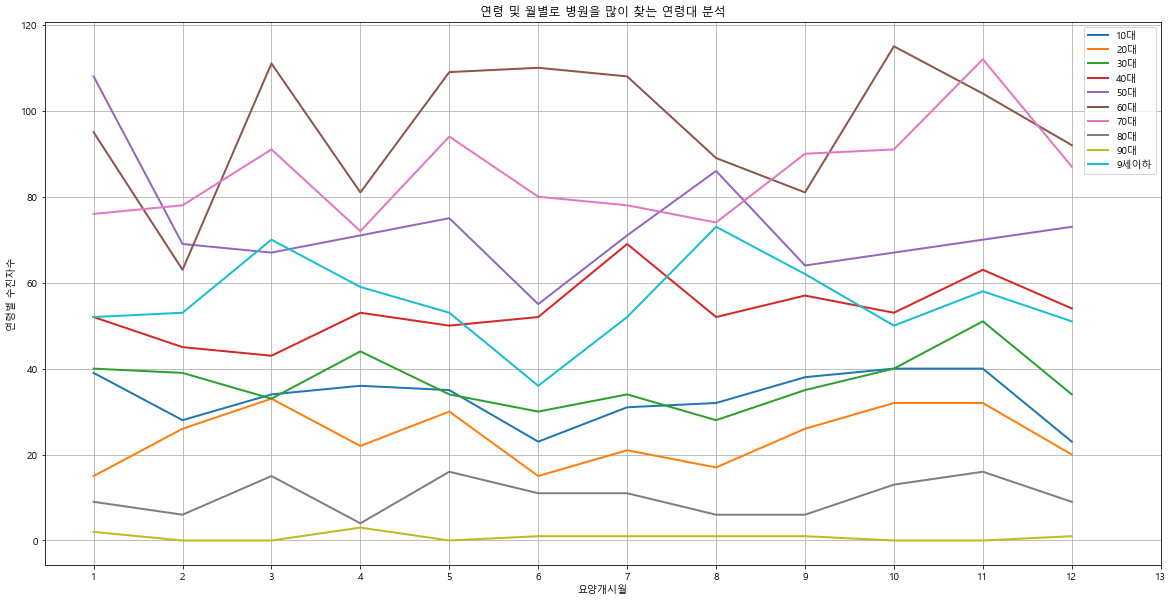

In [61]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=10)

# 데이터 넣기
pivot_month_age.plot()

plt.title("연령 및 월별로 병원을 많이 찾는 연령대 분석")
plt.ylabel("연령별 수진자수")

# x축 범위?
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])

# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()

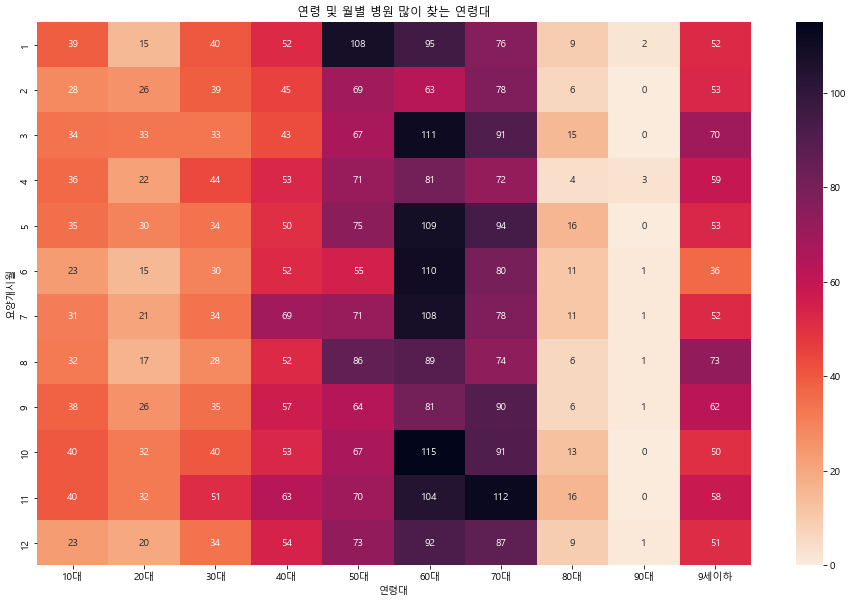

In [62]:
plt.figure(figsize=(16,10))
sns.heatmap(pivot_month_age, annot=True, fmt='.0f', cmap='rocket_r')
plt.title("연령 및 월별 병원 많이 찾는 연령대")
plt.show()

### 월별/연령대별 본인 부담금 확인

In [63]:
pivot_manth_pay = df_month_age_any.pivot_table(values='심결본인부담금',
                            index='요양개시월',
                            columns='연령대',
                            aggfunc='sum')
pivot_manth_pay = pivot_manth_pay.fillna(0)
pivot_manth_pay

연령대,10대,20대,30대,40대,50대,60대,70대,80대,90대,9세이하
요양개시월,,,,,,,,,,
1,209900.0,615790.0,348600.0,629240.0,1475050.0,392100.0,1454180.0,65500.0,7400.0,165500.0
2,139100.0,641870.0,301500.0,259790.0,617200.0,273300.0,986860.0,26600.0,0.0,536340.0
3,172400.0,482650.0,236510.0,306000.0,745900.0,809900.0,944690.0,265500.0,0.0,381700.0
4,207930.0,188100.0,264280.0,870000.0,620000.0,529640.0,808020.0,20500.0,3900.0,276000.0
5,301800.0,312800.0,189700.0,533220.0,850200.0,683600.0,1813490.0,62300.0,0.0,174500.0
6,104900.0,164300.0,227500.0,578860.0,1265060.0,1350100.0,1000160.0,28800.0,1500.0,100000.0
7,167300.0,139700.0,314000.0,363400.0,716530.0,1116700.0,623790.0,55700.0,1500.0,251300.0
8,258000.0,317000.0,154200.0,1461330.0,1366650.0,703300.0,852750.0,30700.0,8500.0,464920.0
9,193300.0,270400.0,189800.0,408200.0,613100.0,1285970.0,1135810.0,49900.0,1500.0,231000.0


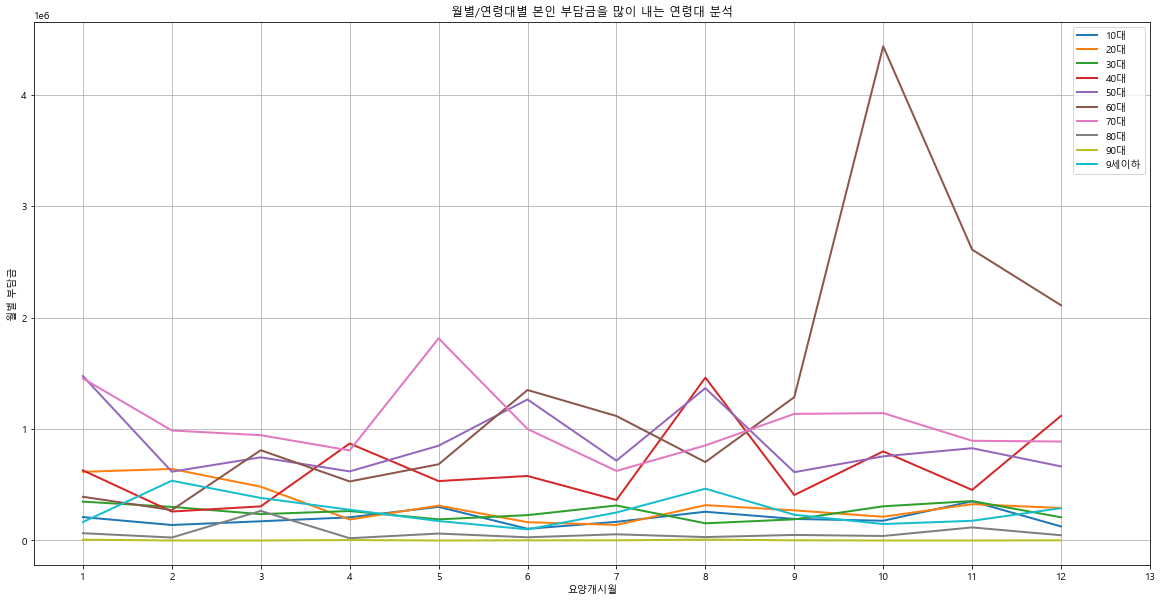

In [64]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=10)

# 데이터 넣기
pivot_manth_pay.plot()

plt.title("월별/연령대별 본인 부담금을 많이 내는 연령대 분석")
plt.ylabel("월별 부담금")

# x축 범위?
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])

# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()

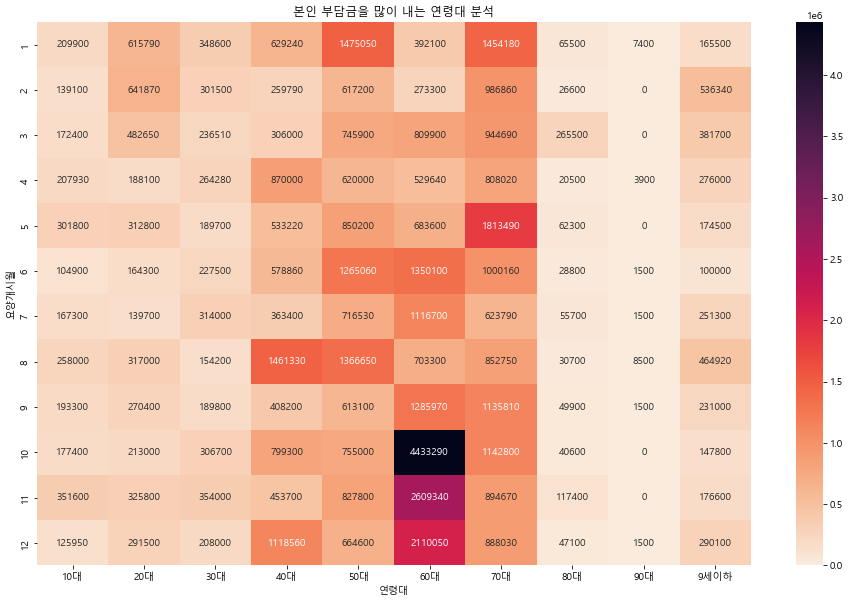

In [65]:
plt.figure(figsize=(16,10))
sns.heatmap(pivot_manth_pay, annot=True, fmt='.0f', cmap='rocket_r')
plt.title("본인 부담금을 많이 내는 연령대 분석")
plt.show()